In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Aarav', 'Priya', 'Rohan', 'Anjali', 'Vikram', 'Sneha', 'Kabir', 'Isha', 'Arjun', 'Tanya'],
    'Maths': [88, 92, 95, np.nan, 70, 85, 77, 150, 90, 82],
    'Science': [91, 87, 78, 88, 67, 90, np.nan, 85, 77, 89],
    'English': [84, 79, 85, 88, 80, 92, 77, 83, 79, 86],
    'Attendance(%)': [92, 88, 94, 90, 75, 89, 101, 85, 80, 87]
}

df = pd.DataFrame(data)

In [16]:
# Check for missing values
df.isnull().sum()

Student_ID       0
Name             0
Maths            1
Science          1
English          0
Attendance(%)    0
dtype: int64

In [17]:
# Fill missing values with mean of the respective columns
df['Maths'] = df['Maths'].fillna(df['Maths'].mean())
df['Science'] = df['Science'].fillna(df['Science'].mean())

In [18]:
# Check for any attendance values greater than 100%
df[df['Attendance(%)'] > 100]


,Student_ID,Name,Maths,Science,English,Attendance(%)
6,107,Kabir,77.0,83.555556,77,101


In [19]:
# Cap attendance values at 100% if they exceed 100%
df['Attendance(%)'] = df['Attendance(%)'].apply(lambda x: 100 if x > 100 else x)


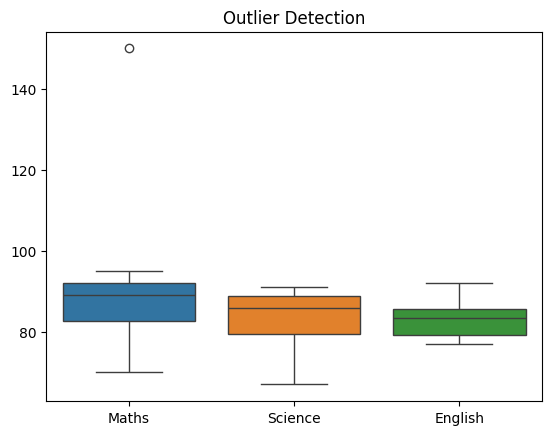

In [20]:
# Visualize outliers using a boxplot for numerical columns
sns.boxplot(data=df[['Maths', 'Science', 'English']])
plt.title("Outlier Detection")
plt.show()


In [21]:
# Calculate the Interquartile Range (IQR) to detect outliers in the 'Maths' column
Q1 = df['Maths'].quantile(0.25)
Q3 = df['Maths'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outlier (150) in the 'Maths' column to the upper bound
df['Maths'] = np.where(df['Maths'] > upper_bound, upper_bound, df['Maths'])

In [22]:
# Apply a log transformation to the 'Maths' column to reduce skewness
df['Maths_log'] = np.log(df['Maths'])


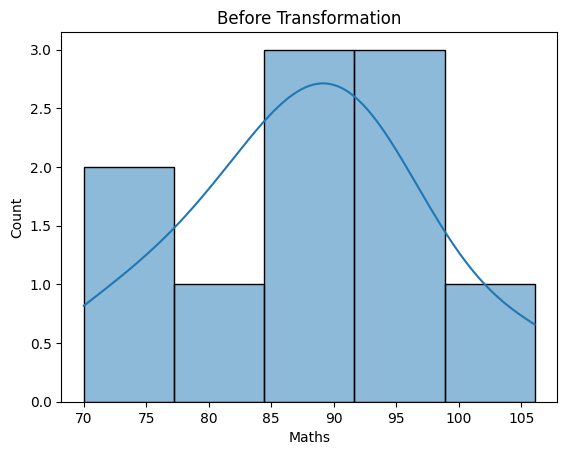

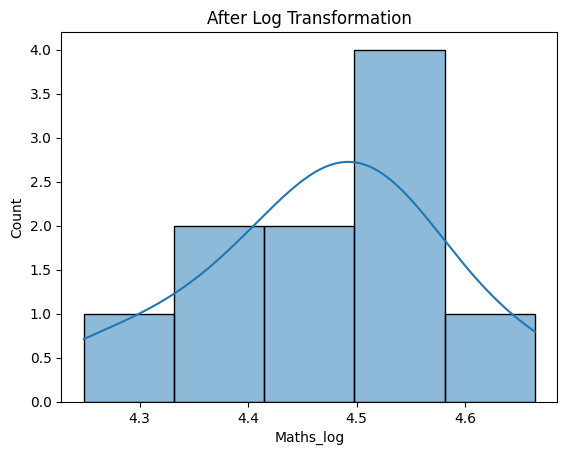

In [23]:
# Plot the 'Maths' column before and after the transformation
sns.histplot(df['Maths'], kde=True)
plt.title("Before Transformation")
plt.show()

sns.histplot(df['Maths_log'], kde=True)
plt.title("After Log Transformation")
plt.show()